Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

Dataset 

In [3]:
Data=pd.read_csv("C:\\Users\\FVIN\\Downloads\\IRIS.csv")
Data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


There are no null values in our data set

In [4]:
Data['species'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object>

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

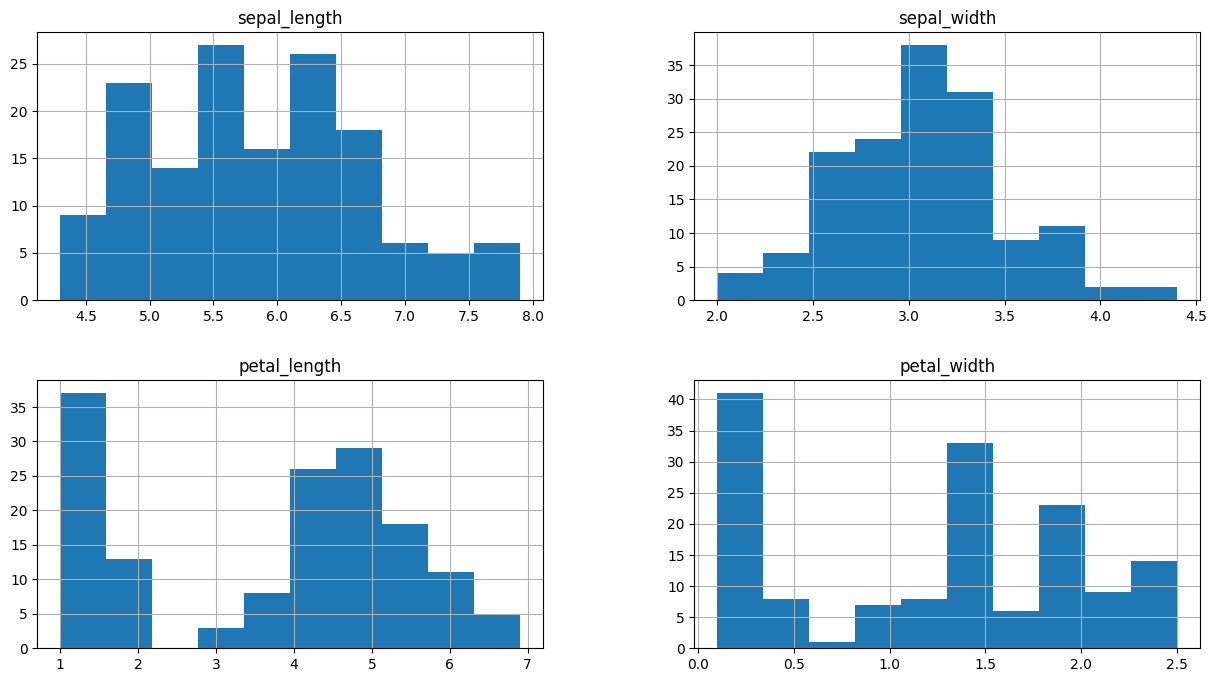

In [6]:
Data.hist(figsize=(15,8))

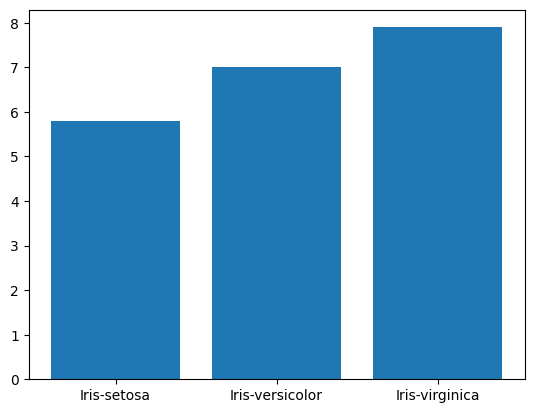

In [7]:
plt.bar(Data['species'],Data['sepal_length'])
plt.show()

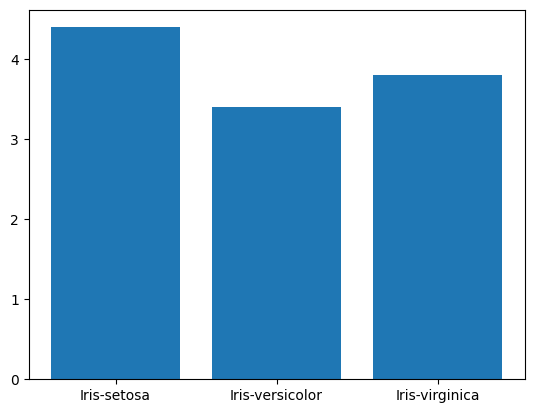

In [8]:
plt.bar(Data['species'],Data['sepal_width'])
plt.show()

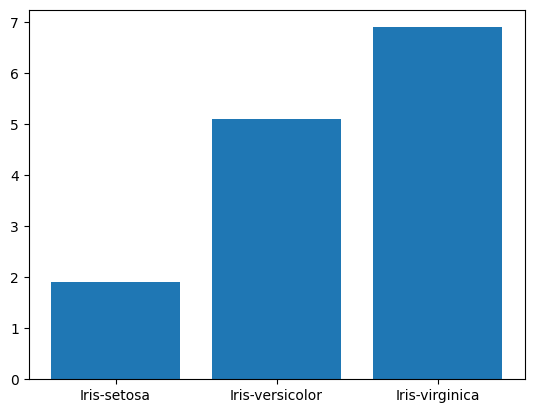

In [9]:
plt.bar(Data['species'],Data['petal_length'])
plt.show()

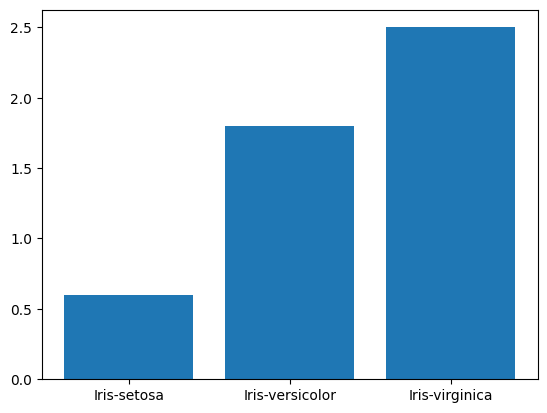

In [10]:
plt.bar(Data['species'],Data['petal_width'])
plt.show()

Encoding The label column to feed the data to our model

In [12]:
de=LabelEncoder()
Data['species']=de.fit_transform(Data['species'])
Data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<Axes: >

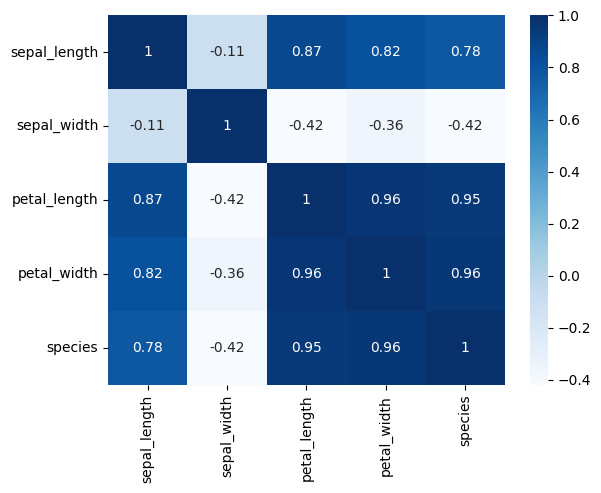

In [14]:
sns.heatmap(Data.corr(),annot=True,cmap="Blues")

In [19]:
X=Data.drop(columns="species",axis=1)
Y=Data['species']

X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

Splitting the data into training data and testing data

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2)
print(X_test.shape,Y_test.shape)

(30, 4) (30,)


Training the model with training data

In [57]:
Dec=DecisionTreeClassifier()
Dec.fit(X_train,Y_train)

DecisionTreeClassifier()

In [58]:
from sklearn.metrics import accuracy_score


pred=Dec.predict(X_test)
accuracy=accuracy_score(pred,Y_test)
print(accuracy)

0.9666666666666667


Model predicted with 96% accuracy